# **Trajectory graph:**

Selected first 10 row values from w(logm) for improved visualization:

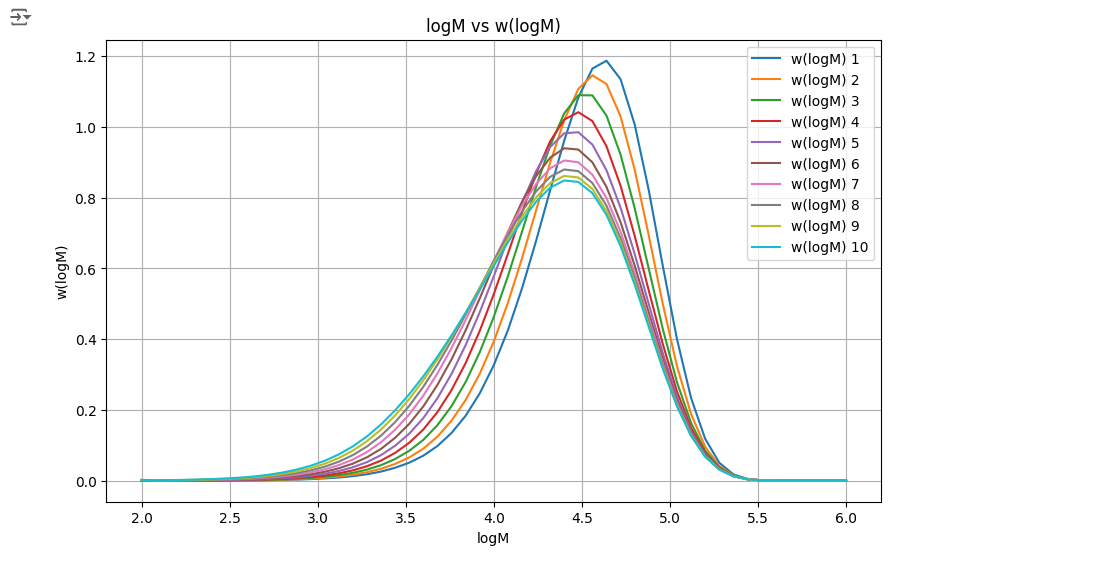

In [ ]:
pip install --upgrade scikeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving va.xlsx to va.xlsx


In [ ]:
df=pd.read_excel("va.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   logM        3601 non-null   object 
 1   Unnamed: 1  3601 non-null   object 
 2   Unnamed: 2  3601 non-null   object 
 3   Unnamed: 3  3601 non-null   object 
 4   2           3601 non-null   float64
 5   2.08        3601 non-null   float64
 6   2.16        3601 non-null   float64
 7   2.24        3601 non-null   float64
 8   2.32        3601 non-null   float64
 9   2.4         3601 non-null   float64
 10  2.48        3601 non-null   float64
 11  2.56        3601 non-null   float64
 12  2.64        3601 non-null   float64
 13  2.72        3601 non-null   float64
 14  2.8         3601 non-null   float64
 15  2.88        3601 non-null   float64
 16  2.96        3601 non-null   float64
 17  3.04        3601 non-null   float64
 18  3.12        3601 non-null   float64
 19  3.2         3601 non-null  

In [ ]:
df1_transposed = df.transpose()
df1_transposed_from_4th_row = df1_transposed.iloc[4:]
print(df1_transposed_from_4th_row.head())

      0         1         2         3         4         5         6     \
2     24.0  0.000212  0.000284  0.000384  0.000519  0.000699  0.000937   
2.08  25.0   0.00011  0.000149    0.0002   0.00027  0.000364  0.000486   
2.16  26.0  0.000134  0.000181  0.000244  0.000329  0.000443  0.000591   
2.24  27.0  0.000198  0.000265  0.000357  0.000481  0.000647  0.000864   
2.32  28.0  0.000286  0.000384  0.000516  0.000695  0.000934  0.001246   

          7         8         9     ...      3591      3592      3593  \
2      0.00124  0.001621  0.002093  ...  0.000972  0.001369  0.001875   
2.08  0.000642  0.000835  0.001074  ...  0.000498  0.000697  0.000945   
2.16   0.00078  0.001016  0.001306  ...  0.000606  0.000847  0.001148   
2.24  0.001139   0.00148  0.001897  ...  0.000879  0.001221  0.001643   
2.32   0.00164  0.002128  0.002722  ...   0.00126  0.001743  0.002329   

          3594      3595      3596      3597      3598      3599      3600  
2     0.002509  0.003278  0.004198  0.0

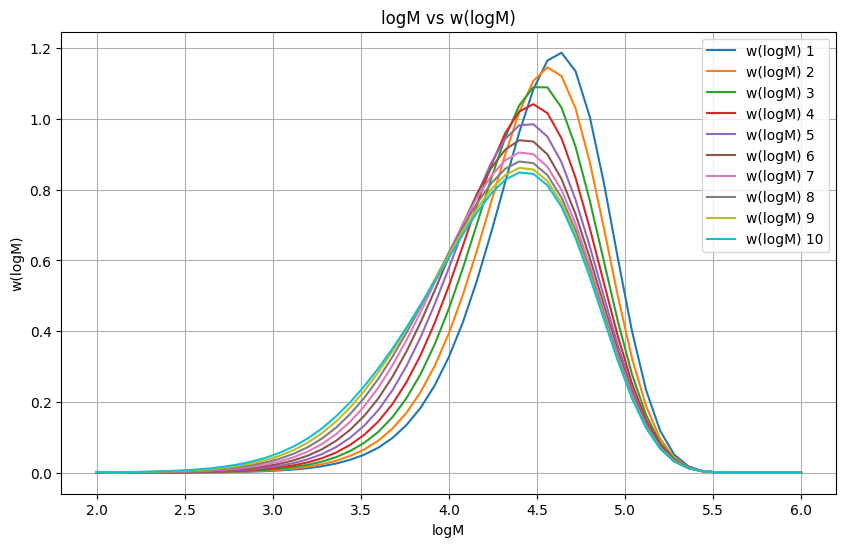

In [ ]:

logM = logM_index = df1_transposed_from_4th_row.index
w_logM = df1_transposed_from_4th_row.iloc[:, 1:].astype(float)

# Plot logM vs w(logM) for the first few rows
plt.figure(figsize=(10, 6))
for i in range(min(10, len(w_logM.columns))):  # Plotting the first 10 columns for clarity
    plt.plot(logM, w_logM.iloc[:, i], label=f'w(logM) {i+1}')

plt.xlabel('logM')
plt.ylabel('w(logM)')
plt.title('logM vs w(logM)')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:


df.columns = df.iloc[0]
# Drop the first row and reset index
df = df[1:].reset_index(drop=True)
X_columns = ['VAc-0', 'tBPPI-0', 'time']
X = df[X_columns].values
y = df.drop(columns=X_columns + ['experiment ID']).values
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train.shape

(2880, 51)

# **RandomForestRegressor, XGBoost, CatBoost, GaussianProcess Model Training and Hyperparameter tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(eval_metric='mlogloss'),
    'CatBoost': CatBoostRegressor(loss_function='MultiRMSE', random_state=42, verbose=0),
    'GaussianProcess': GaussianProcessRegressor()
}

def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    return np.mean(scores)

# Perform cross-validation for each model
print("Cross-validation (5-fold) R^2 scores before training on full data:")
for name, model in models.items():
    if name == 'GaussianProcess':
        model = MultiOutputRegressor(model)
    mean_r2_score = cross_validate_model(model, X_train, y_train)
    print(f'{name} Mean Cross-Validated R^2 Score: {mean_r2_score}')

# Train and evaluate models
print("\nTraining and evaluation:")
for name, model in models.items():
    if name == 'GaussianProcess':
        model = MultiOutputRegressor(model)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MSE: {mse}')
    print(f'{name} R^2 Score: {r2}')


Cross-validation (5-fold) R^2 scores before training on full data:
RandomForest Mean Cross-Validated R^2 Score: 0.991131171324404
XGBoost Mean Cross-Validated R^2 Score: 0.996226898645323
CatBoost Mean Cross-Validated R^2 Score: 0.998520546485586
GaussianProcess Mean Cross-Validated R^2 Score: 0.9946352544732541

Training and evaluation:
RandomForest MSE: 3.60550669959765e-05
RandomForest R^2 Score: 0.9934847408202622
XGBoost MSE: 2.062825092119571e-05
XGBoost R^2 Score: 0.9967901822612049
CatBoost MSE: 4.788937370409557e-06
CatBoost R^2 Score: 0.9988454730508219
GaussianProcess MSE: 6.20542674497185e-05
GaussianProcess R^2 Score: 0.9958770324665928


Cross-validation (5-fold) R^2 scores before training on full data:

RandomForest Mean Cross-Validated R^2 Score: 0.9912784528706695

XGBoost Mean Cross-Validated R^2 Score: 0.996226898645323

CatBoost Mean Cross-Validated R^2 Score: 0.998520546485586

GaussianProcess Mean Cross-Validated R^2 Score: 0.9946352544732541


Training and evaluation:

RandomForest MSE: 3.7530228732723945e-05

RandomForest R^2 Score: 0.9936026066886989

XGBoost MSE: 2.062825092119571e-05

XGBoost R^2 Score: 0.9967901822612049

CatBoost MSE: 4.788937370409557e-06

CatBoost R^2 Score: 0.9988454730508219

GaussianProcess MSE: 6.20542674497185e-05

GaussianProcess R^2 Score: 0.9958770324665928


RandomForest Best Params: {'max_depth': 20, 'n_estimators': 200}
RandomForest Mean Cross-Validated R^2 Score: 0.9913457813490965
RandomForest MSE: 3.6796506884492616e-05
RandomForest R^2 Score: 0.9939990179875637
RandomForest Feature Importance:
VAc-0      0.727348
time       0.217795
tBPPI-0    0.054857
dtype: float64


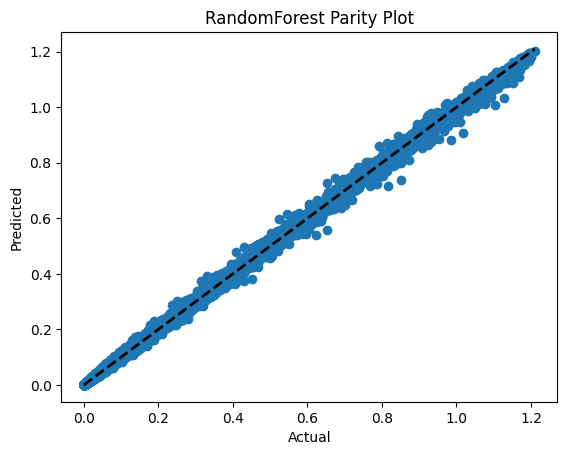

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and hyperparameters
model = RandomForestRegressor()
params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

# Hyperparameter tuning
grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validation
mean_r2_score = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=5).mean()
print(f'RandomForest Best Params: {grid_search.best_params_}')
print(f'RandomForest Mean Cross-Validated R^2 Score: {mean_r2_score}')

# Train and evaluate
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RandomForest MSE: {mse}')
print(f'RandomForest R^2 Score: {r2}')

# Feature importance
importance = best_model.feature_importances_
feature_names =['VAc-0', 'tBPPI-0', 'time']
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print('RandomForest Feature Importance:')
print(feature_importance)

# Parity plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest Parity Plot')
plt.show()


RandomForest Best Params: {'max_depth': 20, 'n_estimators': 200}

RandomForest Mean Cross-Validated R^2 Score: 0.9913457813490965

RandomForest MSE: 3.6796506884492616e-05

RandomForest R^2 Score: 0.9939990179875637

RandomForest Feature Importance:

VAc-0      0.727348

time       0.217795

tBPPI-0    0.054857


XGBoost Best Params: {'learning_rate': 0.1, 'n_estimators': 200}
XGBoost Mean Cross-Validated R^2 Score: 0.9974614954356257
XGBoost MSE: 1.3567074628003063e-05
XGBoost R^2 Score: 0.997945913397529
XGBoost Feature Importance:
VAc-0      0.770013
time       0.171610
tBPPI-0    0.058377
dtype: float32


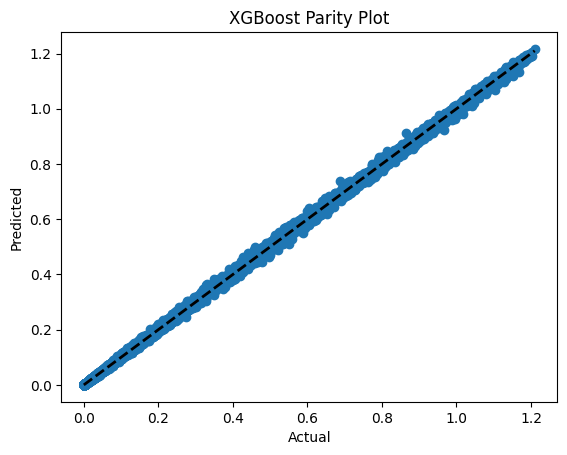

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and hyperparameters
model = XGBRegressor(eval_metric='mlogloss')
params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}

# Hyperparameter tuning
grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validation
mean_r2_score = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=5).mean()
print(f'XGBoost Best Params: {grid_search.best_params_}')
print(f'XGBoost Mean Cross-Validated R^2 Score: {mean_r2_score}')

# Train and evaluate
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'XGBoost MSE: {mse}')
print(f'XGBoost R^2 Score: {r2}')

# Feature importance
importance = best_model.feature_importances_
feature_names = ['VAc-0', 'tBPPI-0', 'time']
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print('XGBoost Feature Importance:')
print(feature_importance)

# Parity plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Parity Plot')
plt.show()

XGBoost Best Params: {'learning_rate': 0.1, 'n_estimators': 200}

XGBoost Mean Cross-Validated R^2 Score: 0.9974614954356257

XGBoost MSE: 1.3567074628003063e-05

XGBoost R^2 Score: 0.997945913397529

XGBoost Feature Importance:

VAc-0      0.770013

time       0.171610

tBPPI-0    0.058377

CatBoost Best Params: {'depth': 8, 'iterations': 500, 'learning_rate': 0.2}
CatBoost Mean Cross-Validated R^2 Score: 0.9993285288203021
CatBoost MSE: 2.9935298576387027e-06
CatBoost R^2 Score: 0.9994706572165215
CatBoost Feature Importance:
VAc-0      58.400586
time       31.043587
tBPPI-0    10.555828
dtype: float64


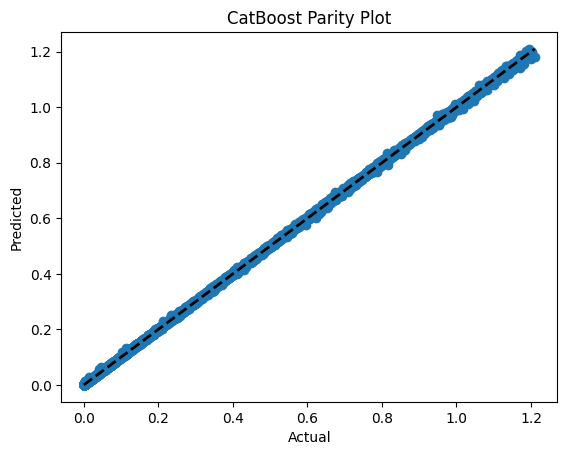

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def define_model(params, random_state=42):
    model = CatBoostRegressor(loss_function='MultiRMSE', random_state=random_state, verbose=0)
    grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
    return grid_search

def hyperparameter_tuning(grid_search, X_train, y_train):
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

def cross_validation(model, X_train, y_train, cv=5):
    return cross_val_score(model, X_train, y_train, scoring='r2', cv=cv).mean()

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

def feature_importance(model, feature_names):
    importance = model.feature_importances_
    return pd.Series(importance, index=feature_names).sort_values(ascending=False)

def plot_parity(y_test, y_pred):
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('CatBoost Parity Plot')
    plt.show()

# Main workflow
X_train, X_test, y_train, y_test = split_data(X, y)
params = {'depth': [6, 8], 'learning_rate': [0.1, 0.2], 'iterations': [200, 500]}
grid_search = define_model(params)
best_model, best_params = hyperparameter_tuning(grid_search, X_train, y_train)
mean_r2_score = cross_validation(best_model, X_train, y_train)

print(f'CatBoost Best Params: {best_params}')
print(f'CatBoost Mean Cross-Validated R^2 Score: {mean_r2_score}')

mse, r2, y_pred = train_and_evaluate(best_model, X_train, y_train, X_test, y_test)
print(f'CatBoost MSE: {mse}')
print(f'CatBoost R^2 Score: {r2}')

feature_names = ['VAc-0', 'tBPPI-0', 'time']
feature_importance_series = feature_importance(best_model, feature_names)
print('CatBoost Feature Importance:')
print(feature_importance_series)

plot_parity(y_test, y_pred)


CatBoost Best Params: {'depth': 8, 'iterations': 500, 'learning_rate': 0.2}

CatBoost Mean Cross-Validated R^2 Score: 0.9993285288203021

CatBoost MSE: 2.9935298576387027e-06

CatBoost R^2 Score: 0.9994706572165215

CatBoost Feature Importance:

VAc-0      58.400586

time       31.043587

tBPPI-0    10.555828

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the kernel for the Gaussian process
kernel = 1 * Matern(nu=2.5) + 1 * RBF(length_scale=1.0)

# Initialize the Gaussian process regressor
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Wrap the Gaussian process regressor with MultiOutputRegressor
multi_gp_model = MultiOutputRegressor(gp_model)

# Define the hyperparameter space
param_grid = {
    'estimator__kernel': [1 * Matern(nu=2.5) + 1 * RBF(length_scale=1.0)],
    'estimator__n_restarts_optimizer': [10]
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(multi_gp_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", random_search.best_params_)

# Train the model using the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE on test data: ", mse)
print("R2 on test data: ", r2)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, RationalQuadratic
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the kernel and parameter grid for tuning
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1)) + RationalQuadratic(alpha=np.log(1), length_scale=1)
param_grid = {
    'estimator__kernel': [kernel],
    'estimator__alpha': [1e-10, 1e-5, 1e-2, 1e0],
    'estimator__n_restarts_optimizer': [0, 1, 2, 5]
}

# Initialize the GaussianProcessRegressor within a MultiOutputRegressor for multi-output regression
gp_model = MultiOutputRegressor(GaussianProcessRegressor())

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(gp_model, param_distributions=param_grid, n_iter=10, scoring='r2', n_jobs=-1, cv=5, random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Retrieve the best estimator
best_gp_model = random_search.best_estimator_

# Train the model with the best found hyperparameters on the training set
best_gp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_gp_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'GaussianProcess MSE: {mse}')
print(f'GaussianProcess R^2 Score: {r2}')
print(f'Best Hyperparameters: {random_search.best_params_}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GaussianProcess Best Params: {'estimator__alpha': 0.001}
GaussianProcess Mean Cross-Validated R^2 Score: 0.9604184432402146
GaussianProcess MSE: 0.0003220850174611899
GaussianProcess R^2 Score: 0.9660004894275085

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming best_model is your trained GaussianProcessRegressor model
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')

# Get feature importance
feature_importance = result.importances_mean
feature_names =  ['VAc-0', 'tBPPI-0', 'time']
importance_df = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

print('GaussianProcess Feature Importance:')
print(importance_df)


GaussianProcess Feature Importance:
VAc-0      0.993991
time       0.735962
tBPPI-0    0.243665
dtype: float64


## **Neural Network Model**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1]))  # Output layer with multiple outputs
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

keras_model = create_model()
keras_regressor = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

scores = cross_val_score(keras_regressor, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation scores: ", scores)

keras_regressor.fit(X_train_scaled, y_train)
y_pred = keras_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE: ", mse)
print("Test R2: ", r2)
for i in range(y_test.shape[1]):
    print("Output {}: MSE = {:.2f}, R2 = {:.2f}".format(i+1, mean_squared_error(y_test[:, i], y_pred[:, i]), r2_score(y_test[:, i], y_pred[:, i])))


ModuleNotFoundError: No module named 'scikeras'

Test MSE:  8.57438284165601e-05
Test R2:  0.8897172746919887

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_model(optimizer='adam', dropout_rate=0.0, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1]))  # Output layer with multiple outputs
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor
keras_regressor = KerasRegressor(model=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__optimizer': ['adam'],
    'model__dropout_rate': [0.1, 0.2],
    'model__neurons': [32, 64],
    'epochs': [ 50, 100],
    'batch_size': [ 32, 64]
}

# Define the scoring function
scorer = make_scorer(r2_score)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1)
grid_search_result = grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))

# Evaluate the model with the best parameters
best_model = grid_search_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE: ", mse)
print("Test R2: ", r2)
for i in range(y_test.shape[1]):
    print("Output {}: MSE = {:.2f}, R2 = {:.2f}".format(i+1, mean_squared_error(y_test[:, i], y_pred[:, i]), r2_score(y_test[:, i], y_pred[:, i])))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.943157 using {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.1, 'model__neurons': 64, 'model__optimizer': 'adam'}
Test MSE:  4.21243887960666e-05
Test R2:  0.9708062463254656
Output 1: MSE = 0.00, R2 = 0.87
Output 2: MSE = 0.00, R2 = 0.71
Output 3: MSE = 0.00, R2 = 0.93
Output 4: MSE = 0.00, R2 = 0.80
Output 5: MSE = 0.00, R2 = 0.88
Output 6: MSE = 0.00, R2 = 0.95
Output 7: MSE = 0.00, R2 = 0.96
Output 8: MSE = 0.00, R2 = 0.95
Output 9: MSE = 0.00, R2 = 0.96
Output 10: MSE = 0.00, R2 = 0.97
Output 11: MSE = 0.00, R2 = 0.97
Output 12: MSE = 0.00, R2 = 0.97
Output 13: MSE = 0.00, R2 = 0.98
Output 14: MSE = 0.00, R2 = 0.98
Output 15: MSE = 0.00, R2 = 0.98
Output 16: MSE = 0.00, R2 = 0.99
Output 17: MSE = 0.00, R2 = 0.99
Output 18: MSE = 0.00, R2 = 0.99
Output 19: MSE = 0.00, R2 = 0.99
Output 20: MSE = 0.00, R2 = 1.00
Output 21: MSE = 0.00, R2 = 1.00
Output 22: MSE = 0.00, R2 = 1.00
Output 23: MSE = 0.00, R2 = 1.00
Output 24: MSE = 0.00, R2 = 1.00
Output 25: MSE = 0.00, 

Best: 0.943157 using {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.1, 'model__neurons': 64, 'model__optimizer': 'adam'}
Test MSE:  4.21243887960666e-05
Test R2:  0.9708062463254656

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming best_model is your trained KerasRegressor model
results = permutation_importance(best_model, X_test_scaled, y_test, scoring='r2')
feature_names=['VAc-0', 'tBPPI-0', 'time']
# Print feature importances
for i in results.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]:<8} {results.importances_mean[i]:.3f} +/- {results.importances_std[i]:.3f}")


VAc-0    0.984 +/- 0.025
time     0.715 +/- 0.025
tBPPI-0  0.345 +/- 0.008


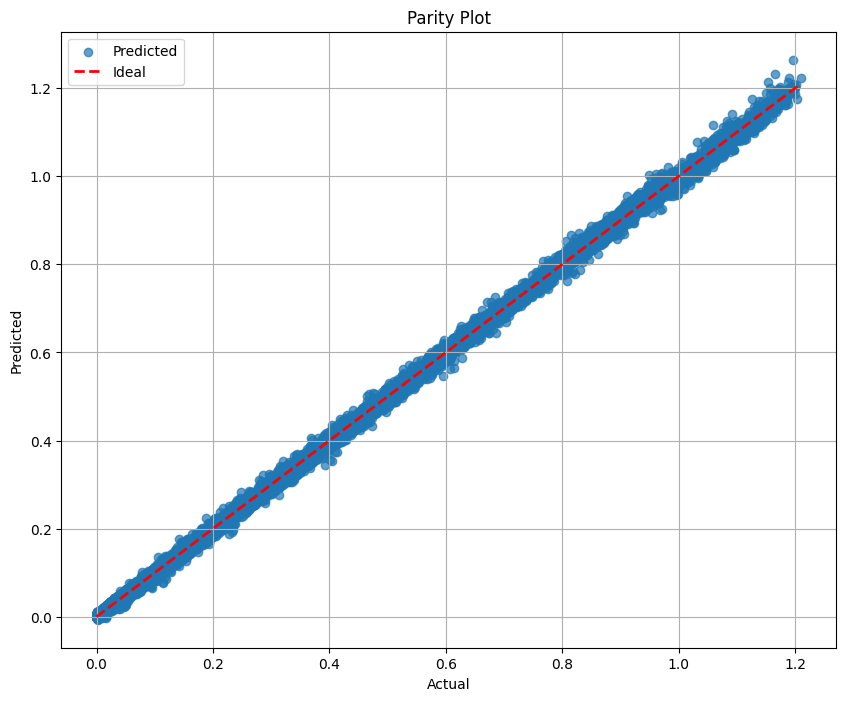

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_model is already trained as per the previous steps
y_pred = best_model.predict(X_test_scaled)

# Create a parity plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, label='Predicted', alpha=0.7)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--', lw=2, label='Ideal')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Parity Plot')
plt.legend()
plt.grid(True)
plt.show()


## **Kernal density regression model**

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize a list to store the Kernel Regression models for each output variable
kr_models = []
X=X.astype(float)
y=y.astype(float)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Loop through each output variable and create a separate Kernel Regression model
for i in range(y_train.shape[1]):
    kr_model = KernelReg(endog=y_train[:, i], exog=X_train, var_type='c'* X_train.shape[1])
    kr_models.append(kr_model)

# Make predictions on the test set for each output variable
y_pred = []
for kr_model in kr_models:
    pred, _ = kr_model.predict(X_test)
    y_pred.append(pred)
y_pred = np.array(y_pred).T

# Evaluate the model on the test set for each output variable
mse = []
r2 = []
for i in range(y_test.shape[1]):
    mse.append(mean_squared_error(y_test[:, i], y_pred[:, i]))
    r2.append(r2_score(y_test[:, i], y_pred[:, i]))

print("MSE on test data for each output variable: ", mse)
print("R2 on test data for each output variable: ", r2)

# Perform custom cross-validation for each output variable
def custom_cross_val_score(model, X, y, cv=5):
    scores = []
    for train_idx, test_idx in KFold(n_splits=cv).split(X):
        model = KernelReg(endog=y[train_idx], exog=X[train_idx], var_type='c'* X.shape[1])
        pred, _ = model.predict(X[test_idx])
        scores.append(r2_score(y[test_idx], pred))
    return np.array(scores)

scores = []
for i in range(y_train.shape[1]):
    scores.append(custom_cross_val_score(kr_models[i], X_train, y_train[:, i], cv=5))
print("Average R2 score from cross-validation for each output variable: ", [score.mean() for score in scores])


In [ ]:
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg

# Sample data
X = np.random.rand(100, 2)
y = np.random.rand(100, 2)

# Define a custom kernel regression model
class CustomKernelReg:
    def __init__(self):
        self.models = []

    def fit(self, X, y):
        for i in range(y.shape[1]):
            model = KernelReg(endog=y[:, i], exog=X, var_type='cc')
            self.models.append(model)

    def predict(self, X):
        predictions = []
        for model in self.models:
            pred, _ = model.fit(X)
            predictions.append(pred)
        return np.column_stack(predictions)

# Wrap the custom kernel regression model with MultiOutputRegressor
multi_output_regressor = MultiOutputRegressor(CustomKernelReg())
multi_output_regressor.fit(X, y)
predictions = multi_output_regressor.predict(X)

print(predictions)
